## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [5]:
#write your solution here
import pandas as pd


### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [6]:
#Read the data into a dataframe
#Inser your code
df = pd.read_csv("goodreads.csv")




#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()



4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html  2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478   
1                          dir01/41865.Twilight.html  2579564   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123   
3                dir01/1885.Pride_and_Prejudice.html  1388992   
4                dir01/18405.Gone_with_the_Wind.html   645470   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [7]:
#Read the data into a dataframe specifying column names
df = pd.read_csv("goodreads.csv",names=['rating','review_count','isbn','booktype','author_url','year','genre_urls','dir','rating_count','name'])

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 



### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [8]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes


rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [9]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
df.isna().sum()
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.


rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer : The values are not as expected because in review count, the values are in string where we cant even perform count. And also year cannot be in float.

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [10]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [11]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna()]


rating review_count  isbn booktype author_url  year genre_urls  \
3643     NaN         None  None     None       None   NaN        NaN   
5282     NaN         None  None     None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [12]:

df.shape

(6000, 10)

In [13]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### we are going to drop only missing values in Rating, so we use subset or else we could use only dropna()
df.dropna(subset = ['rating','year'],inplace=True)#inplace = True is used to update the columns
df.shape


(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [14]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [15]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######we have to use astype for type conversion
df['rating_count'] = df['rating_count'].astype('int')
df['review_count'] = df['review_count'].astype('int')
df['year'] = df['year'].astype('int')
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [16]:
#Insert Your code here
df.isna().sum()

rating            0
review_count      0
isbn            471
booktype          0
author_url        0
year              0
genre_urls       59
dir               0
rating_count      0
name              0
dtype: int64

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [17]:
#Get the first author_url
author = df['author_url'][0]
author


'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [18]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######from the url, we want just the name
name = author.split(".")[-1]
name


'Suzanne_Collins'

In [19]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_author(url):
  name = url.split(".")[-1]
  return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [20]:

#firstly create a new dataframe
newdf = df.dropna(subset = ['genre_urls'])
newdf.shape


(5934, 11)

In [21]:
#Get first genre_url
firstgenre = newdf['genre_urls'][0]
firstgenre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [22]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######
#We just wants to print all the genres, not like above
genres = firstgenre.split("/genres/")
genres = "".join(genres) #to remove '/'
genres


'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [23]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_genre(url):
  genres = url.split("/genres/")[1:]
  genres  = "".join(genres)
  print(genres)
  return genres

newdf['genres'] = newdf.genre_urls.map(get_genre)
newdf.head()



Streaming output truncated to the last 5000 lines.
classics|fiction|adventure|science-fiction|literature|fantasy|cultural|france|travel|historical-fiction|novels
paranormal|vampires|young-adult|fantasy|paranormal|fantasy|romance|romance|paranormal-romance|fantasy|supernatural|fantasy|urban-fantasy|fiction|fantasy|magic
romance|contemporary|realistic-fiction|young-adult|new-adult|drama|dark|family|romance|contemporary-romance|young-adult|teen
fantasy|young-adult|fiction|fantasy|dragons|fantasy|magic|adventure|science-fiction-fantasy|fantasy|epic-fantasy|young-adult|teen|young-adult|young-adult-fantasy
fantasy|young-adult|fantasy|paranormal|romance|paranormal|vampires|paranormal|angels|fantasy|urban-fantasy|fantasy|supernatural|shapeshifters|werewolves|fantasy|magic
fantasy|fantasy|paranormal|romance|paranormal-romance|fantasy|urban-fantasy|humor
fantasy|fiction|young-adult|childrens|adventure|fantasy|magic|romance|childrens|middle-grade
young-adult|fantasy|fantasy|paranormal|romance|par

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

## Part 4:  EDA

Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics.Classified into two: Univariate or multivariate(usually just bivariate)

## 4.1 Univariate (One Variable)

<function matplotlib.pyplot.show>

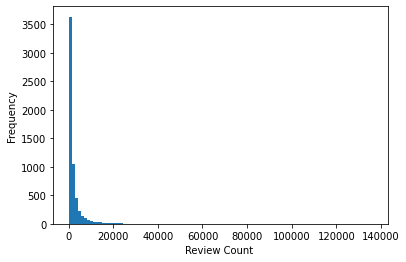

In [24]:
#ploting histogram because, its only one variable and histogram needs just one variable
import matplotlib.pyplot as plt
%matplotlib inline
x = newdf.review_count
plt.hist(x, bins=100)
plt.xlabel("Review Count ")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show>

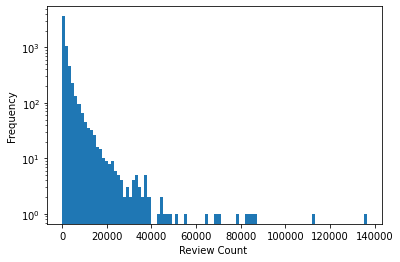

In [25]:
#same code using log, notice the x label. Log is, example = if first x label is 0, then second will be 10, 100, 10000
x = newdf.review_count
plt.hist(x, bins=100,log = True)
plt.xlabel("Review Count ")
plt.ylabel("Frequency")
plt.show
#We can use log if the graph doesnt come nicely like above graph

**Barplot**

**4.2 Multivariate**

---

## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [26]:
#Deterime best book each year based on rating. 
df_book = df[df['year'] >= 2000]
df_book.groupby(['year']).max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  This is separate from the ipykernel package so we can avoid doing imports until


rating  review_count         booktype  \
year                                          
2000    4.64         43943  good_reads:book   
2001    4.50         36670  good_reads:book   
2002    4.62         46332  good_reads:book   
2003    4.66         38061  good_reads:book   
2004    4.58         26761  good_reads:book   
2005    4.80         85746  good_reads:book   
2006    4.67         50663  good_reads:book   
2007    4.76         38199  good_reads:book   
2008    4.75        136455  good_reads:book   
2009    4.69         79046  good_reads:book   
2010    4.93         83643  good_reads:book   
2011    5.00         82098  good_reads:book   
2012    5.00        112279  good_reads:book   
2013    4.93         47308  good_reads:book   
2014    5.00         11011  good_reads:book   

                                             author_url  \
year                                                      
2000  https://www.goodreads.com/author/show/970554.I...   
2001  https://www.goodreads.com/author/show/9993.Mar...   
2002  https://www.goodreads.com/author/show/9972.Jul...   
2003  https://www.goodreads.com/author/show/9987.Phi...   
2004  https://www.goodreads.com/author/show/9678.Ann...   
2005  https://www.goodreads.com/author/show/9987.Phi...   
2006  https://www.goodreads.com/author/show/9987.Phi...   
2007  https://www.goodreads.com/author/show/978484.L...   
2008  https://www.goodreads.com/author/show/9987.Phi...   
2009  https://www.goodreads.com/author/show/99650.We...   
2010  https://www.goodreads.com/author/show/99650.We...   
2011  https://www.goodreads.com/author/show/99650.We...   
2012  https://www.goodreads.com/author/show/98389.Ri...   
2013  https://www.goodreads.com/author/show/88506.Jo...   
2014  https://www.goodreads.com/author/show/8507331....   

                                                    dir  rating_count  \
year                                                                    
2000                        dir60/39937.Blue_Angel.html       1297716   
2001  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...        794732   
2002                 dir60/65686.Nightmare_Academy.html       1268863   
2003              dir60/231.I_am_Charlotte_Simmons.html       1284478   
2004                            dir60/47667.Seeing.html        646158   
2005                dir60/78508.The_River_of_Doubt.html       2579564   
2006                dir60/30189.Cast_In_Courtlight.html        885435   
2007                           dir60/702051.Gideon.html       1245866   
2008                         dir60/2177563.Madness.html       2958974   
2009                                 dir60/6976667.html       1443600   
2010                  dir60/7831742-the-lost-saint.html       1316704   
2011                       dir60/9758765-wildefire.html       1127983   
2012                  dir60/8419647-never-eighteen.html       1150626   
2013             dir60/17899696-the-edge-of-always.html        358301   
2014                  dir60/20504754-transcendence.html         69924   

                                                  name          author  
year                                                                    
2000                                     Wish You Well   Wendell_Berry  
2001                                   Year of Wonders     Yann_Martel  
2002                      You Shall Know Our Velocity!  _sne_Seierstad  
2003                                     ÙØ§ ØªØ­Ø²Ù  William_Gibson  
2004                                 Ù¾ÛØ±Ù Ú©Ø§Ù
Ù    Walter_Moers  
2005                                             Zorro     Zadie_Smith  
2006                             ÙØ§Ø­Ø© Ø§ÙØºØ±ÙØ¨               _  
2007                                    Ú¤ÙØ±ØªÙØ¬Ù               _  
2008                                    Ù¡/Ù¤ Ø¬Ø±Ø§Ù
               _  
2009                               Ø£ÙÙØ§Ø­ ÙØ¯Ø³Ø±               _  
2010                               ØªØ±Ø§Ø¨ Ø§ÙÙ
Ø§Ø³               _  
2011  ÙÙ 

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [27]:
newdf.head()

rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

In [28]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### To print out all the unique genres
set_genre = set() #this is a syntax to create a empty set
for genre in newdf.genres:
  set_genre.update(genre.split("|"))
print(len(set_genre))

537


In [29]:
#plot the data here


March 23th, 2022


In [30]:
#using size function
cdf = df.groupby('year',sort=False)
print(cdf)
cdf.size()

year
2008    254
2003    166
2005    200
1960     17
1813      1
       ... 
1391      1
1621      1
1589      1
1106      1
1140      1
Length: 293, dtype: int64

In [31]:
#using first function
cdf.first()

rating  review_count        isbn         booktype  \
year                                                      
2008    4.40        136455  0439023483  good_reads:book   
2003    4.41         16648  0439358078  good_reads:book   
2005    3.56         85746  0316015849  good_reads:book   
1960    4.23         47906  0061120081  good_reads:book   
1813    4.23         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
1391    3.86           427  0141183721  good_reads:book   
1621    4.21            83  0940322668  good_reads:book   
1589    3.70           667  0671722921  good_reads:book   
1106    3.98           134  0192803735  good_reads:book   
1140    3.42           118  8489163936  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/153394.S...   
2003  https://www.goodreads.com/author/show/1077326....   
2005  https://www.goodreads.com/author/show/941441.S...   
1960  https://www.goodreads.com/author/show/1825.Har...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1391  https://www.goodreads.com/author/show/3706.Geo...   
1621  https://www.goodreads.com/author/show/9796.Rob...   
1589  https://www.goodreads.com/author/show/947.Will...   
1106  https://www.goodreads.com/author/show/5158478....   
1140  https://www.goodreads.com/author/show/5158478....   

                                             genre_urls  \
year                                                      
2008  /genres/young-adult|/genres/science-fiction|/g...   
2003  /genres/fantasy|/genres/young-adult|/genres/fi...   
2005  /genres/young-adult|/genres/fantasy|/genres/ro...   
1960  /genres/classics|/genres/fiction|/genres/histo...   
1813  /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
1391  /genres/fiction|/genres/classics|/genres/liter...   
1621  /genres/psychology|/genres/philosophy|/genres/...   
1589  /genres/plays|/genres/classics|/genres/drama|/...   
1106  /genres/fantasy|/genres/mythology|/genres/clas...   
1140  /genres/poetry|/genres/classics|/genres/europe...   

                                                    dir  rating_count  \
year                                                                    
2008                dir01/2767052-the-hunger-games.html       2958974   
2003  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2005                          dir01/41865.Twilight.html       2579564   
1960              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
1813                dir01/1885.Pride_and_Prejudice.html       1388992   
...                                                 ...           ...   
1391         dir56/9648.Keep_the_Aspidistra_Flying.html          7029   
1621        dir56/557658.The_Anatomy_of_Melancholy.html           720   
1589                  dir58/72978.Titus_Andronicus.html         13070   
1106                          dir58/75586.The_T_in.html          1988   
1140                  dir59/73419.Poema_de_M_o_Cid.html          3463   

                                                   name               author  
year                                                                          
2008            The Hunger Games (The Hunger Games, #1)      Suzanne_Collins  
2003  Harry Potter and the Order of the Phoenix (Har...          J_K_Rowling  
2005                            Twilight (Twilight, #1)      Stephenie_Meyer  
1960                              To Kill a Mockingbird           Harper_Lee  
1813                                Pride and Prejudice          Jane_Austen  
...                                                 ...                  ...  
1391                         Keep the Aspidistra Flying        George_Orwell  
1621                          The Anatomy

In [32]:
cdf.last()

rating  review_count        isbn         booktype  \
year                                                      
2008    3.97           496  0618754458  good_reads:book   
2003    3.36          1693  0312424442  good_reads:book   
2005    4.17          2226  0767913736  good_reads:book   
1960    4.48           460  0393048470  good_reads:book   
1813    4.23         34772  0679783261  good_reads:book   
...      ...           ...         ...              ...   
1391    3.86           427  0141183721  good_reads:book   
1621    4.21            83  0940322668  good_reads:book   
1589    3.70           667  0671722921  good_reads:book   
1106    3.98           134  0192803735  good_reads:book   
1140    3.42           118  8489163936  good_reads:book   

                                             author_url  \
year                                                      
2008  https://www.goodreads.com/author/show/26256.Ma...   
2003  https://www.goodreads.com/author/show/3083854....   
2005  https://www.goodreads.com/author/show/44565.Ca...   
1960  https://www.goodreads.com/author/show/8164.Lew...   
1813  https://www.goodreads.com/author/show/1265.Jan...   
...                                                 ...   
1391  https://www.goodreads.com/author/show/3706.Geo...   
1621  https://www.goodreads.com/author/show/9796.Rob...   
1589  https://www.goodreads.com/author/show/947.Will...   
1106  https://www.goodreads.com/author/show/5158478....   
1140  https://www.goodreads.com/author/show/5158478....   

                                             genre_urls  \
year                                                      
2008  /genres/autobiography|/genres/memoir|/genres/n...   
2003  /genres/fiction|/genres/novels|/genres/contemp...   
2005  /genres/history|/genres/non-fiction|/genres/bi...   
1960  /genres/classics|/genres/fiction|/genres/fanta...   
1813  /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
1391  /genres/fiction|/genres/classics|/genres/liter...   
1621  /genres/psychology|/genres/philosophy|/genres/...   
1589  /genres/plays|/genres/classics|/genres/drama|/...   
1106  /genres/fantasy|/genres/mythology|/genres/clas...   
1140  /genres/poetry|/genres/classics|/genres/europe...   

                                              dir  rating_count  \
year                                                              
2008                   dir60/2177563.Madness.html          6732   
2003        dir60/231.I_am_Charlotte_Simmons.html         17743   
2005          dir60/78508.The_River_of_Doubt.html         16618   
1960        dir60/176972.The_Annotated_Alice.html          5312   
1813          dir01/1885.Pride_and_Prejudice.html       1388992   
...                                           ...           ...   
1391   dir56/9648.Keep_the_Aspidistra_Flying.html          7029   
1621  dir56/557658.The_Anatomy_of_Melancholy.html           720   
1589            dir58/72978.Titus_Andronicus.html         13070   
1106                    dir58/75586.The_T_in.html          1988   
1140            dir59/73419.Poema_de_M_o_Cid.html          3463   

                            name               author  
year                                                   
2008                     Madness     Marya_Hornbacher  
2003      I am Charlotte Simmons            Tom_Wolfe  
2005          The River of Doubt      Candice_Millard  
1960         The Annotated Alice        Lewis_Carroll  
1813         Pride and Prejudice          Jane_Austen  
...                          ...                  ...  
1391  Keep the Aspidistra Flying        George_Orwell  
1621   The Anatomy of Melancholy        Robert_Burton  
1589            Titus Andronicus  William_Shakespeare  
1106                   The TÃ¡in            Anonymous  
1140           Poema de MÃ­o Cid            Anonymous  

[293 rows x 10 columns]

In [33]:
cdf.groups

{2008: [0, 127, 138, 188, 195, 198, 289, 309, 337, 343, 368, 380, 383, 422, 434, 459, 471, 478, 479, 483, 501, 544, 584, 653, 657, 663, 698, 730, 738, 751, 763, 805, 825, 840, 847, 862, 902, 937, 941, 943, 959, 1005, 1024, 1025, 1057, 1061, 1090, 1095, 1137, 1142, 1150, 1172, 1262, 1328, 1401, 1414, 1420, 1425, 1472, 1531, 1545, 1568, 1585, 1598, 1602, 1615, 1635, 1778, 1808, 1832, 1861, 1862, 1890, 1901, 1904, 1905, 1918, 1988, 2007, 2008, 2040, 2047, 2049, 2058, 2083, 2088, 2136, 2149, 2158, 2164, 2189, 2193, 2237, 2258, 2288, 2293, 2302, 2321, 2348, 2363, ...], 2003: [1, 11, 16, 113, 115, 238, 286, 297, 376, 435, 442, 470, 555, 574, 590, 630, 640, 690, 757, 784, 811, 856, 898, 987, 1044, 1146, 1213, 1221, 1240, 1312, 1356, 1363, 1380, 1415, 1470, 1503, 1520, 1564, 1571, 1619, 1675, 1780, 1817, 1859, 1883, 1910, 1920, 1955, 1983, 2031, 2066, 2105, 2131, 2213, 2226, 2252, 2254, 2327, 2356, 2396, 2447, 2453, 2457, 2462, 2569, 2571, 2603, 2604, 2661, 2666, 2671, 2702, 2809, 2827, 2856, 

In [34]:
cdf.mean()

rating  review_count  rating_count
year                                      
2008  4.016220   3227.248031  5.466514e+04
2003  3.985783   2495.873494  6.277566e+04
2005  3.991600   3536.580000  7.070979e+04
1960  4.016471   4013.294118  1.770642e+05
1813  4.230000  34772.000000  1.388992e+06
...        ...           ...           ...
1391  3.860000    427.000000  7.029000e+03
1621  4.210000     83.000000  7.200000e+02
1589  3.700000    667.000000  1.307000e+04
1106  3.980000    134.000000  1.988000e+03
1140  3.420000    118.000000  3.463000e+03

[293 rows x 3 columns]

In [35]:
cdf.sum()

rating  review_count  rating_count
year                                     
2008  1020.12        819721      13884946
2003   661.64        414315      10420760
2005   798.32        707316      14141957
1960    68.28         68226       3010091
1813     4.23         34772       1388992
...       ...           ...           ...
1391     3.86           427          7029
1621     4.21            83           720
1589     3.70           667         13070
1106     3.98           134          1988
1140     3.42           118          3463

[293 rows x 3 columns]

In [36]:
#To find mean just for one column
cdf['rating'].mean()

year
2008    4.016220
2003    3.985783
2005    3.991600
1960    4.016471
1813    4.230000
          ...   
1391    3.860000
1621    4.210000
1589    3.700000
1106    3.980000
1140    3.420000
Name: rating, Length: 293, dtype: float64

In [37]:
#to find mean of multiple columns
cdf[['rating','review_count']].mean()

rating  review_count
year                        
2008  4.016220   3227.248031
2003  3.985783   2495.873494
2005  3.991600   3536.580000
1960  4.016471   4013.294118
1813  4.230000  34772.000000
...        ...           ...
1391  3.860000    427.000000
1621  4.210000     83.000000
1589  3.700000    667.000000
1106  3.980000    134.000000
1140  3.420000    118.000000

[293 rows x 2 columns]

**Use agg() method to find aggregation of groups**

In [38]:
cdf.agg({"rating" : 'max',"review_count" : 'mean'})

rating  review_count
year                      
2008    4.75   3227.248031
2003    4.66   2495.873494
2005    4.80   3536.580000
1960    4.48   4013.294118
1813    4.23  34772.000000
...      ...           ...
1391    3.86    427.000000
1621    4.21     83.000000
1589    3.70    667.000000
1106    3.98    134.000000
1140    3.42    118.000000

[293 rows x 2 columns]

**Iterating through groups**

In [39]:
for group_name, group in cdf:
  print(group_name)

2008
2003
2005
1960
1813
1936
1949
1964
1945
1979
1997
1865
1597
1862
1973
1954
1985
1890
1866
1952
1908
1988
1953
2012
1937
1962
1897
1932
2009
1967
1847
1963
1884
2002
2007
1911
2006
2011
1859
2001
-800
1877
1955
1969
1961
1989
1951
1972
1925
1978
2004
1818
1861
1943
1892
1996
1998
1938
1982
1880
1940
1957
1991
1999
1922
1605
1851
1868
1976
1993
1995
1975
1926
1876
1981
1994
1850
1942
1977
1980
1965
1959
1915
1986
1939
1321
1900
1928
2000
1902
1931
1971
1895
1891
1983
1923
1843
1595
1899
1970
1390
1920
1856
1990
1929
1903
1839
2010
1883
1992
1950
1987
1905
1946
1958
1910
1934
1603
1844
1855
1667
1852
1759
1854
1869
1623
2013
1916
1872
632
1933
1930
1974
1726
1918
800
1814
1901
1906
1968
1924
1314
1947
1787
1532
1831
1719
1927
1914
1984
1944
1817
1853
-380
1948
1860
1601
1913
1599
1886
1874
1966
1935
1600
1898
1909
1919
900
1823
-29
1956
1881
1830
-429
1819
1889
-512
1798
1894
-500
1794
1590
-442
1609
1870
1812
1008
1826
1879
1678
1774
2014
1348
1611
1825
1873
1848
1845
1767
1885
1864